In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(readxl)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [6]:
#Read Data, make class as factor
pumpkin_data <- read_excel("Pumpkin_Seeds_Dataset.xlsx", sheet = 1) |>
                    mutate(Class = as.factor(Class))

pumpkin_data

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


In [7]:
#Check The Quantity of each class

count_pumpkin <- group_by(pumpkin_data, Class) |>
                    summarize(count = n())

count_pumpkin

Class,count
<fct>,<int>
Çerçevelik,1300
Ürgüp Sivrisi,1200


In [20]:
# They are kinda equal, so it is good

In [36]:
# After doing some analysis with the data, we decide to go with parameter major axis, minor axis, eccentricity, roundness, aspect ration, compactness
# as our parameters, as it shows a really difference between the two clases.

pumpkin_data_select <- select(pumpkin_data, Major_Axis_Length, Minor_Axis_Length, Eccentricity, Roundness, Aspect_Ration, Compactness, Class)

In [37]:
# Spliting the data 75:25
pumpkin_split <- initial_split(pumpkin_data_select, prop = 0.8 , strata = Class)  
train_pumpkin <- training(pumpkin_split)   
test_pumpkin <- testing(pumpkin_split)
train_pumpkin
test_pumpkin

Major_Axis_Length,Minor_Axis_Length,Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
417.1932,234.2289,0.8275,0.8440,1.7811,0.7487,Çerçevelik
435.8328,211.0457,0.8749,0.7674,2.0651,0.6929,Çerçevelik
381.5638,222.5322,0.8123,0.8486,1.7146,0.7624,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮
507.2200,222.1872,0.8990,0.7549,2.2828,0.6599,Ürgüp Sivrisi
501.9065,204.7531,0.9130,0.7185,2.4513,0.6359,Ürgüp Sivrisi
462.8951,234.5597,0.8621,0.7933,1.9735,0.7104,Ürgüp Sivrisi


Major_Axis_Length,Minor_Axis_Length,Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
326.1485,220.2388,0.7376,0.8963,1.4809,0.8207,Çerçevelik
383.8883,220.4545,0.8187,0.8338,1.7413,0.7557,Çerçevelik
368.7807,201.2084,0.8380,0.8357,1.8328,0.7365,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮
438.2606,154.5346,0.9358,0.6564,2.8360,0.5892,Ürgüp Sivrisi
557.6689,259.8084,0.8848,0.7635,2.1465,0.6792,Ürgüp Sivrisi
404.8890,204.3520,0.8633,0.8106,1.9813,0.7087,Ürgüp Sivrisi


In [38]:
# Here are some plots that shows a really strong realtionship among all chosen parameters

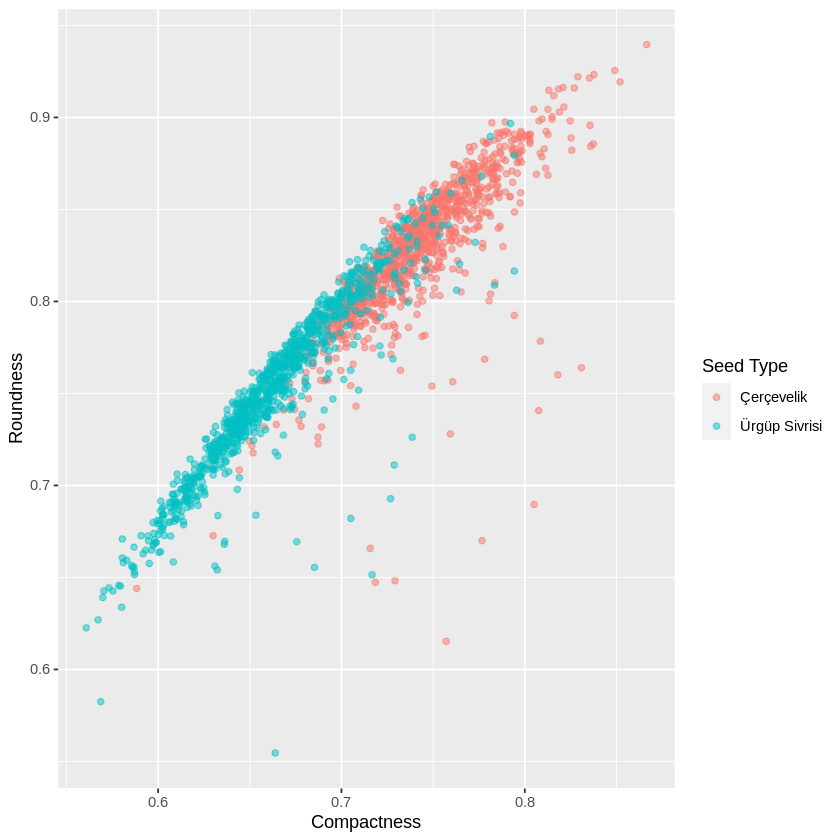

In [39]:
pumpkin_plot_1 <- ggplot(train_pumpkin, aes(x = Compactness, y = Roundness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Compactness", y = "Roundness", color = "Seed Type")

pumpkin_plot_1

In [40]:
# Equiv Diameter vs compactness plot also shows a good clustering

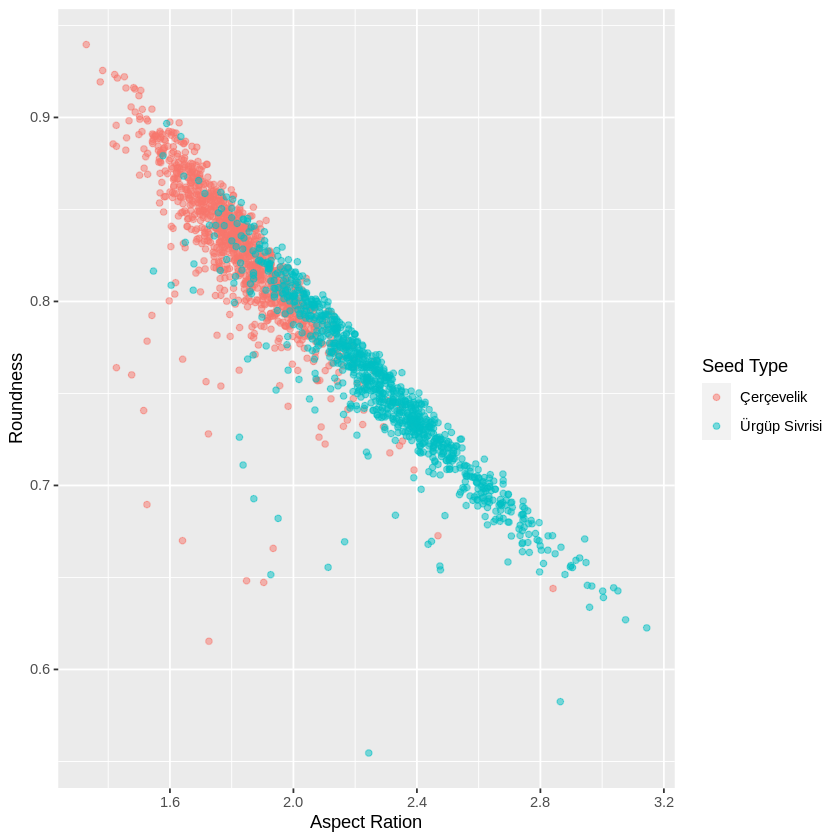

In [41]:
pumpkin_plot_2 <- ggplot(train_pumpkin, aes(x = Aspect_Ration, y = Roundness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Aspect Ration", y = "Roundness", color = "Seed Type")

pumpkin_plot_2

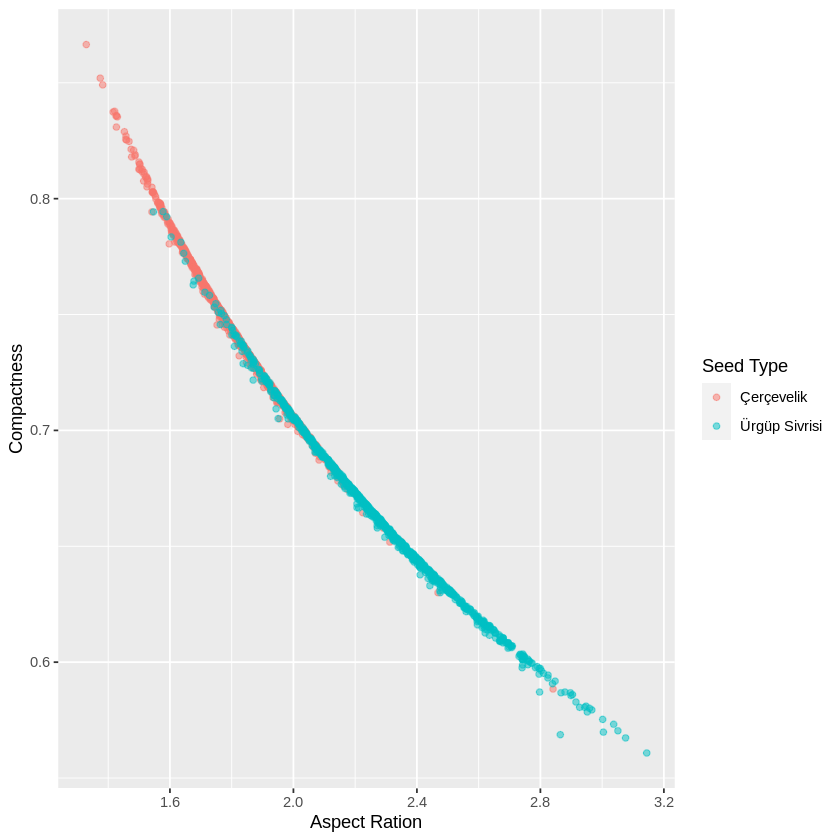

In [42]:
pumpkin_plot_2 <- ggplot(train_pumpkin, aes(x = Aspect_Ration, y = Compactness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Aspect Ration", y = "Compactness", color = "Seed Type")

pumpkin_plot_2